In [1]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from fbprophet import Prophet

In [2]:
df = pd.read_csv("32.csv", index_col=0)
df.head()

,"ACESSORIO CABO DE FORCA BR 1,80M PRETO M/F C7",ACESSORIO MONOPOD PAU DE SELFIE CABO AMARELO,ACESSORIO MONOPOD PAU DE SELFIE CABO AZUL,ACESSORIO MONOPOD PAU DE SELFIE CABO BRANCO,ACESSORIO MONOPOD PAU DE SELFIE CABO PRETO,ACESSORIO MONOPOD PAU DE SELFIE CABO ROSA,AEREO 120CM 3P CG196 TKA-VERMONT,AEREO CD-211 DUPLO C/NICHO CARV/ONIX UV,AEREO CD-212 QUADRADO 612 CARV/ONIX UV,AEREO GELADEIRA NAPOLI 800X475X305 CARV/BR,...,VENTILADOR VF50 SILENCE FORCE MESA 50CM,VENTILADOR VF52 SILENCE FORCE COLUNA,VENTILADOR VFM2 SIL FORCE VE3230B4,VENTILADOR VFM3 SIL FORCE VE3240B4 PT,VENTILADOR ZEFIRO BLACK 220V MALLORY,VENTILADOR ZEFIRO BR MALLORY,VENTILADOR ZT 401 ZAITEC MATRIX,VIVOBOOK 2G 500 CEL TOUCH ROSA X200MA CT139H,VIVOBOOK 2G 500 CEL TOUCH X200MA CT138H,XXXXXXXXXXXXXXXXXXXXXXXX
2015-01-02,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-03,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-05,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,2.0,0.0,0.0,0.0,NaN
2015-01-06,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,0.0,NaN
2015-01-07,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,NaN,0.0,0.0,NaN,0.0,0.0,1.0,0.0,NaN


In [3]:
df = df[[x for x in df.columns if "TELEVISOR" in x]]
              
df.head()

,"TELEVISOR 14"" PH14D PHILCO","TELEVISOR 16"" PH16D10DB PHILCO","TELEVISOR 20"" PH20M91D PHILCO","TELEVISOR 20"" PH20U21D PHILCO","TELEVISOR 24"" 24MT49DF LG","TELEVISOR 24"" L24D2700 SEMP TCL","TELEVISOR 24"" LT24D310LHFMZD SAMSUNG","TELEVISOR 24"" PH24N91D PHILCO","TELEVISOR 28"" 28LJ720B LG","TELEVISOR 28"" L28D2900 SEMP TCL",...,TELEVISOR SMART TC-32 FS600B PANASONIC,TELEVISOR TC-32 A400B EM CORES PANASONIC,TELEVISOR TC-32 CS600B EM CORES PANASONIC,TELEVISOR TC-39 AS600B EM CORES PANASONIC,TELEVISOR TC-40 C400B EM CORES PANASONIC,TELEVISOR TC-42 AS610B EM CORES PANASONIC,TELEVISOR TC-43 CS630B EM CORES PANASONIC,TELEVISOR TC-49 CS630B EM CORES PANASONIC,TELEVISOR TC-50 A400B EM CORES PANASONIC,TELEVISOR TV-1452 AV SEMP TCL
2015-01-02,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
2015-01-03,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
2015-01-05,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
2015-01-06,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
2015-01-07,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


A base de dados possuem 105 modelos de televisores

In [4]:
df = df[[x for x in df.columns if "TELEVISOR" in x]]
for qtde in df.columns.tolist():
    print(qtde)

TELEVISOR 14" PH14D PHILCO
TELEVISOR 16" PH16D10DB PHILCO
TELEVISOR 20" PH20M91D PHILCO
TELEVISOR 20" PH20U21D PHILCO
TELEVISOR 24" 24MT49DF LG
TELEVISOR 24" L24D2700 SEMP TCL
TELEVISOR 24" LT24D310LHFMZD SAMSUNG
TELEVISOR 24" PH24N91D PHILCO
TELEVISOR 28" 28LJ720B LG
TELEVISOR 28" L28D2900 SEMP TCL
TELEVISOR 28" PH28D27D PHILCO
TELEVISOR 28" PH28N91D PHILCO
TELEVISOR 32" 32LH515B LG
TELEVISOR 32" DL3253 SEMP TCL
TELEVISOR 32" KDL-32R305B SONY
TELEVISOR 32" L1800 SEMP TCL
TELEVISOR 32" L32D2900 SEMP TCL
TELEVISOR 32" PH32E31DG PHILCO
TELEVISOR 32" TC32A400B PANASONIC
TELEVISOR 32" TC32D400 PANASONIC
TELEVISOR 32" UN32J4000 SAMSUNG
TELEVISOR 40" KDL-40R355B SONY
TELEVISOR 40" L40D2900 SEMP TCL
TELEVISOR 40" TC40D400B PANASONIC
TELEVISOR 43" 43LH5150 LG
TELEVISOR 49" 49LH5150 LG
TELEVISOR COLOR 20 HPS 2097 CCE
TELEVISOR EM CORES TC 32 AS600B
TELEVISOR EM CORES TC 39 A400B
TELEVISOR LT-24 D310LHMZD C/T.CRIS.LIQ.
TELEVISOR SEMP TV 1454
TELEVISOR SMART 28" 28MT49S LG
TELEVISOR SMART 32" 32L

Detalhes de cada televisão do banco de dados.

In [5]:
su = df.sum()
su = su.sort_values(kind='quicksort', ascending=False)
su[:10]

TELEVISOR SMART 32" UN32J4300 SAMSUNG       235.0
TELEVISOR SMART 32" L32S4900S SEMP TCL      161.0
TELEVISOR 32" TC32A400B PANASONIC           143.0
TELEVISOR SMART 40" TC40DS600B PANASONIC    123.0
TELEVISOR 28" PH28D27D PHILCO               119.0
TELEVISOR SMART 32" KDL-32W655D SONY        118.0
TELEVISOR SMART 32" PH32B51DSWG PHILCO       80.0
TELEVISOR SMART 32" UN32J4290 SAMSUNG        76.0
TELEVISOR SMART 32" TC32DS600B PANASONIC     75.0
TELEVISOR 32" TC32D400 PANASONIC             75.0
dtype: float64

O modelo de televisão que possui mais vendas é [TELEVISOR SMART 32" UN32J4300 SAMSUNG ](https://www.magazineluiza.com.br/smart-tv-led-32-samsung-un32j4300-wi-fi-conversor-digital-2-hdmi-1-usb/p/193365700/et/elit/). E o segundo modelo que possui mais vendas é [TELEVISOR SMART 32" L32S4900S SEMP TCL](https://www.extra.com.br/smart-tv-led-32-hd-semp-tcl-l32s4900s-3-hdmi-2-usb-wi-fi-integrado-conversor-digital/p/11796255)

Para realizar uma previsão por semanas, será necessário reajustar a granularidadee preencher os valoresna base de dados com 0.

In [6]:
df.fillna(value=0, inplace=True)

In [7]:
df.index = pd.to_datetime(df.index)

dfw = df.resample('W-THU').sum()
dfw.head()

,"TELEVISOR 14"" PH14D PHILCO","TELEVISOR 16"" PH16D10DB PHILCO","TELEVISOR 20"" PH20M91D PHILCO","TELEVISOR 20"" PH20U21D PHILCO","TELEVISOR 24"" 24MT49DF LG","TELEVISOR 24"" L24D2700 SEMP TCL","TELEVISOR 24"" LT24D310LHFMZD SAMSUNG","TELEVISOR 24"" PH24N91D PHILCO","TELEVISOR 28"" 28LJ720B LG","TELEVISOR 28"" L28D2900 SEMP TCL",...,TELEVISOR SMART TC-32 FS600B PANASONIC,TELEVISOR TC-32 A400B EM CORES PANASONIC,TELEVISOR TC-32 CS600B EM CORES PANASONIC,TELEVISOR TC-39 AS600B EM CORES PANASONIC,TELEVISOR TC-40 C400B EM CORES PANASONIC,TELEVISOR TC-42 AS610B EM CORES PANASONIC,TELEVISOR TC-43 CS630B EM CORES PANASONIC,TELEVISOR TC-49 CS630B EM CORES PANASONIC,TELEVISOR TC-50 A400B EM CORES PANASONIC,TELEVISOR TV-1452 AV SEMP TCL
2015-01-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-02-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Matriz de Correlação

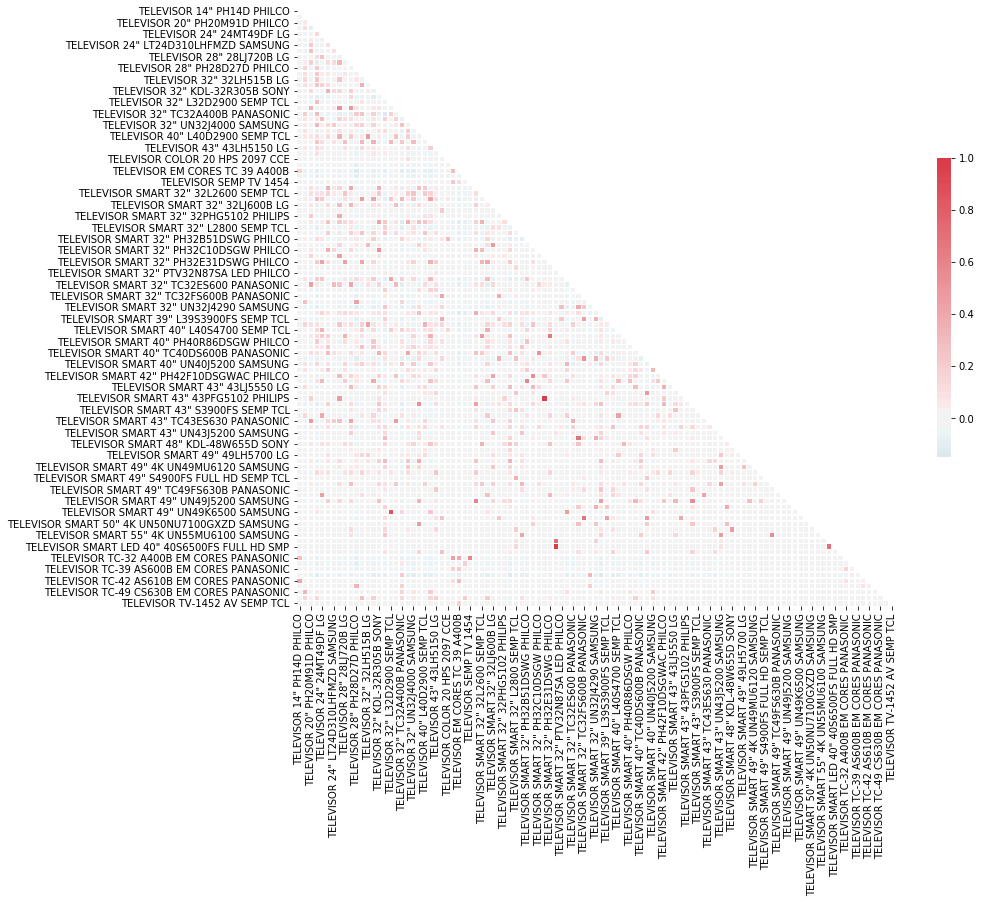

In [8]:
corr = dfw.corr()

# Apenas fazer a plotagem de metade da matriz, pois a matriz é simétrica
mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize = (15, 11))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Desenhar a matriz de correlação usando heatmap
sns.heatmap(corr, mask = mask, cmap = cmap, center = 0,
            square = True, linewidths = .5, cbar_kws = {"shrink": .5})


A partir da análise da matriz de correlação pode-se notar que há alguns pares que possuem correlação forte. No entanto,não são muitos pares.

Pares com correlação forte (p >= 0.7): 5


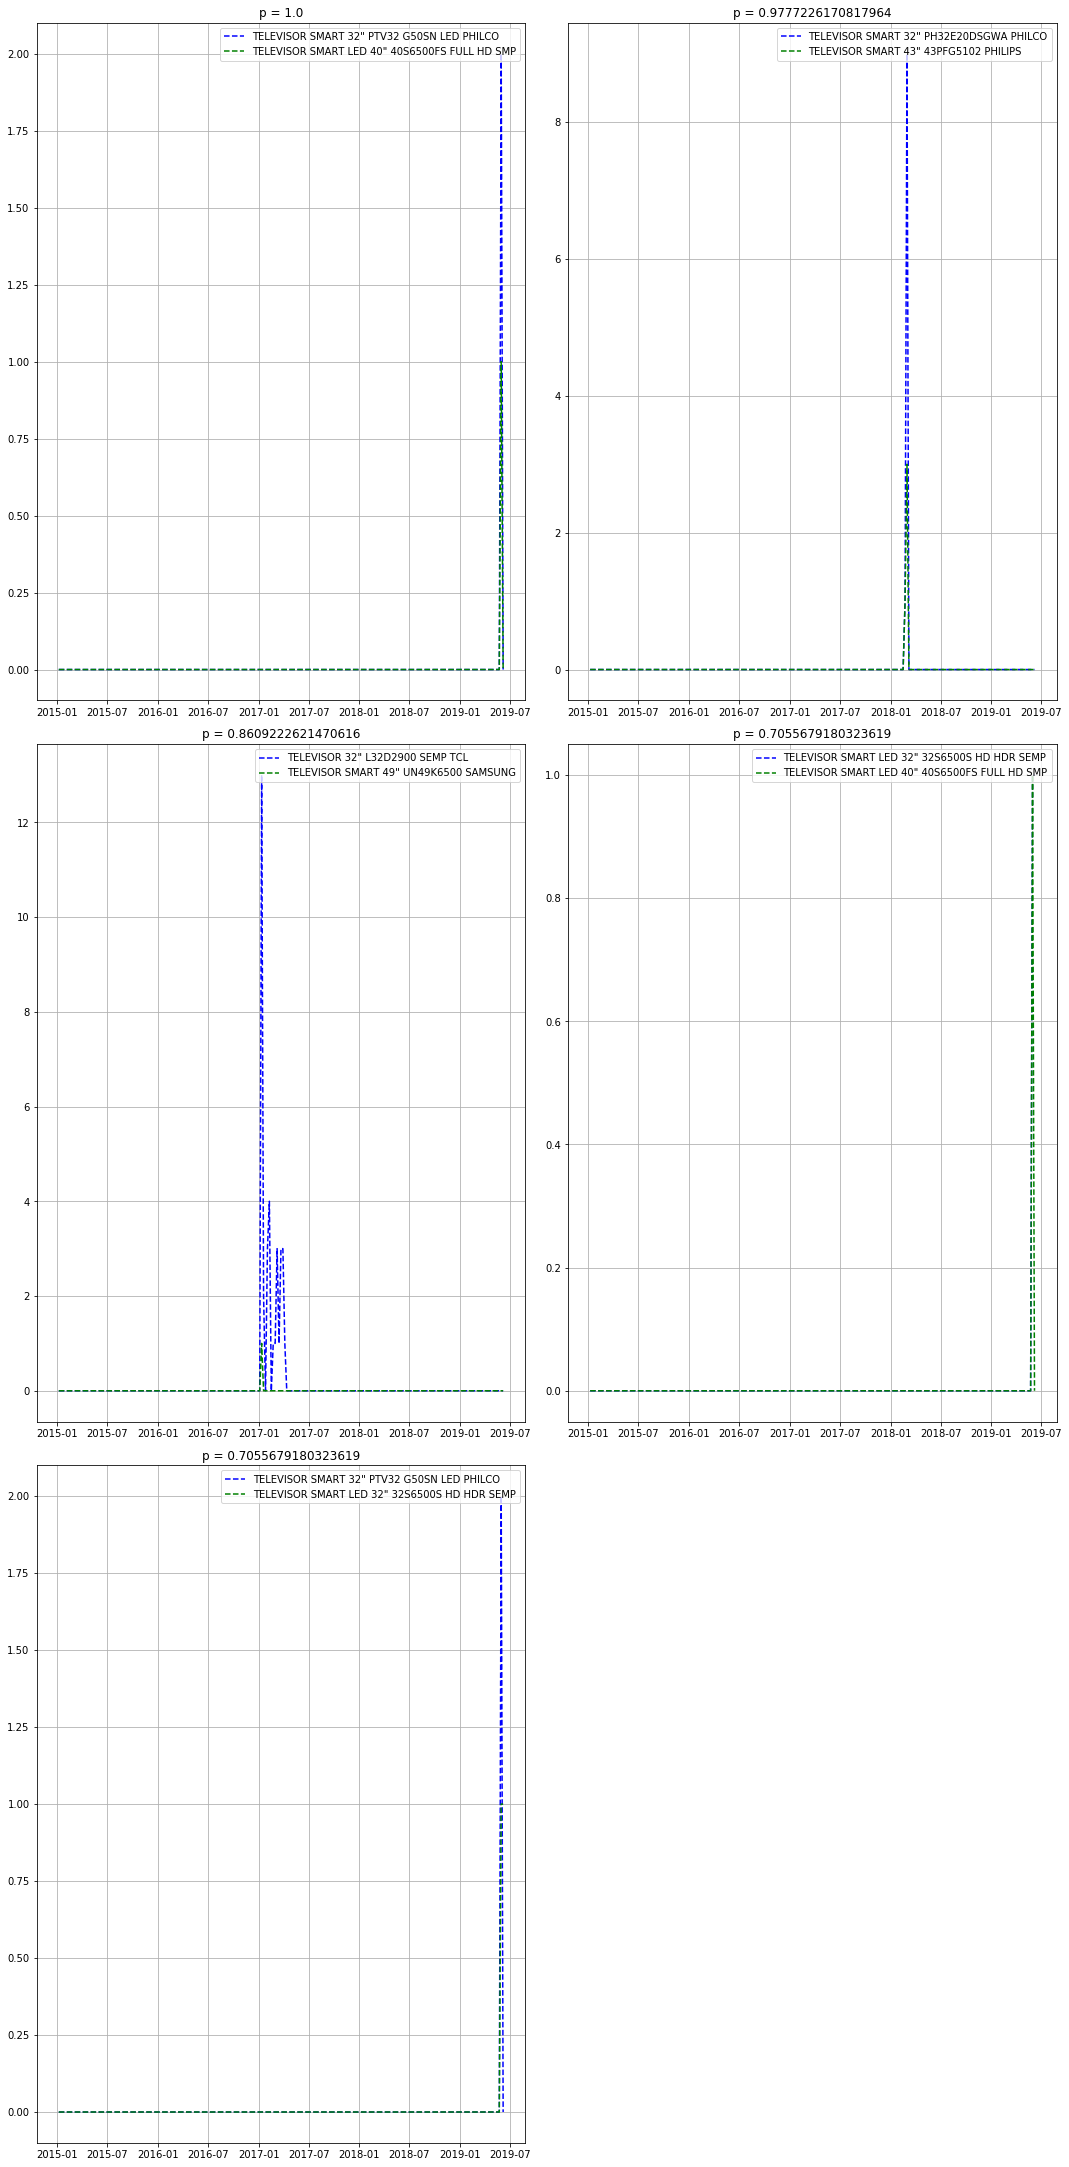

In [9]:
corr.loc[:,:] = np.tril(corr.values, k=-1)

s = corr.unstack()

so = s.sort_values(kind="quicksort", ascending=False)

plt.figure(figsize=(15,50))

num_s = len([x for x in so.tolist() if x >= 0.7])
print("Pares com correlação forte (p >= 0.7): %d" % num_s)

for i in range(num_s):
    plt.subplot(num_s, 2, i+1)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
plt.tight_layout()
plt.show()

Percebe-se uma correlação forte(p>=0.7) entre 5 pares. E também possui essa correlação forte porque as suas vendas estão concentradas em poucas semanas. Em apenas um par os televisores possuem a mesma polegada.

Pares com correlação negativa (p <= 0.2): 0 


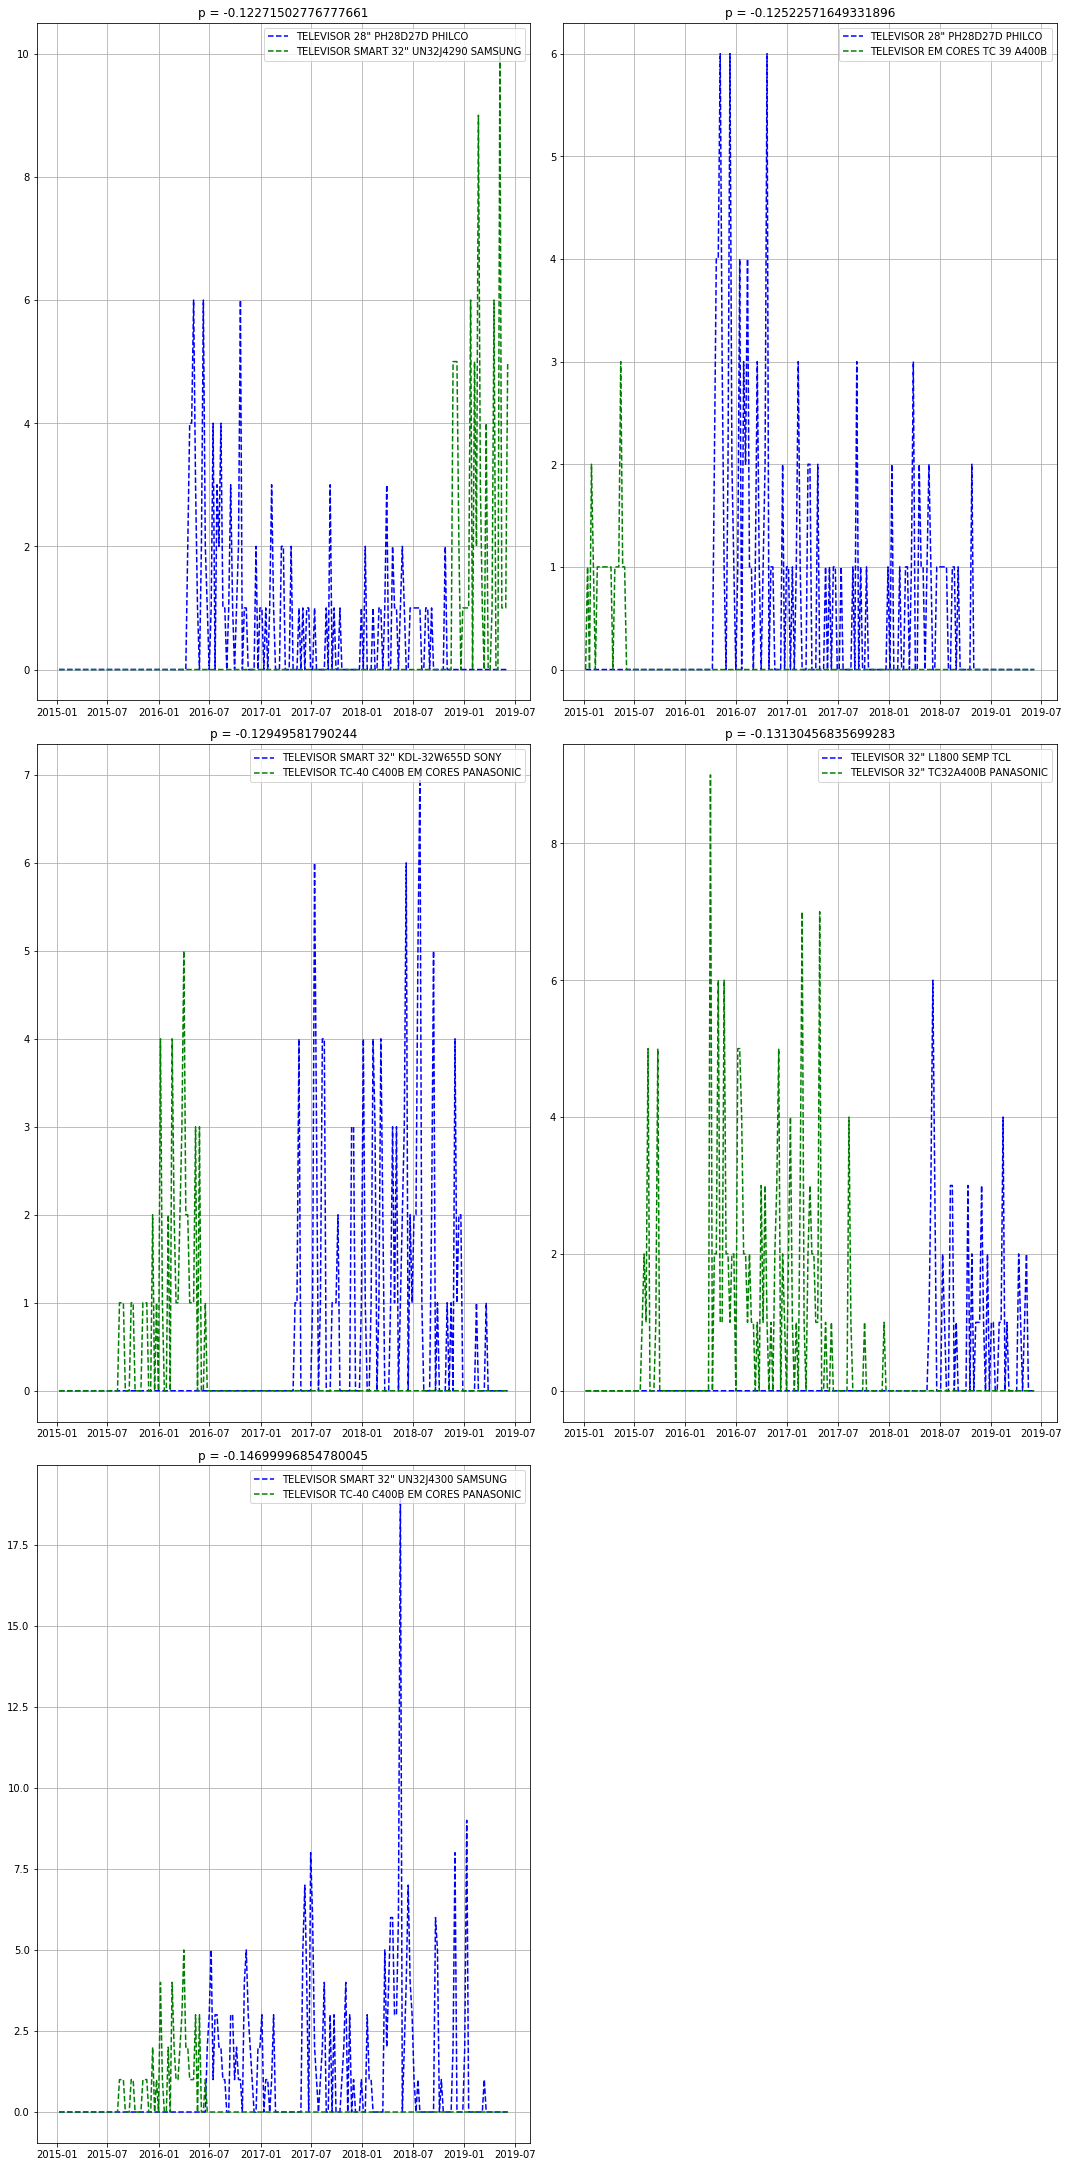

In [10]:
num_n = len([x for x in so.tolist() if x <= -0.2])

print("Pares com correlação negativa (p <= 0.2): %d " % num_n)
plt.figure(figsize=(15,50))

for i in range(len(so)-num_s, len(so)):
    plt.subplot(num_s, 2, i+1-len(so)+num_s)
    plt.grid(True)
    plt.plot(dfw[so.index[i][0]], "b--", dfw[so.index[i][1]], "g--", label=so.index[i][0])
    plt.legend([so.index[i][0], so.index[i][1]], loc ='upper right')
    plt.title("p = " + str(so.values[i]))
    
plt.tight_layout()
plt.show()

Já em relação as correlações negativas(p<=0.2) não foi encontrado nenhum par.Sendo assim nenhum modelo será incorporado um ao outro para formar uma nova categoria. Pode-se notar que enquanto a vendas de um certo modelo cresce o outro cai e vice-versa.






**Observação da série temporal com vendas acima ou igual a 80 no período.**

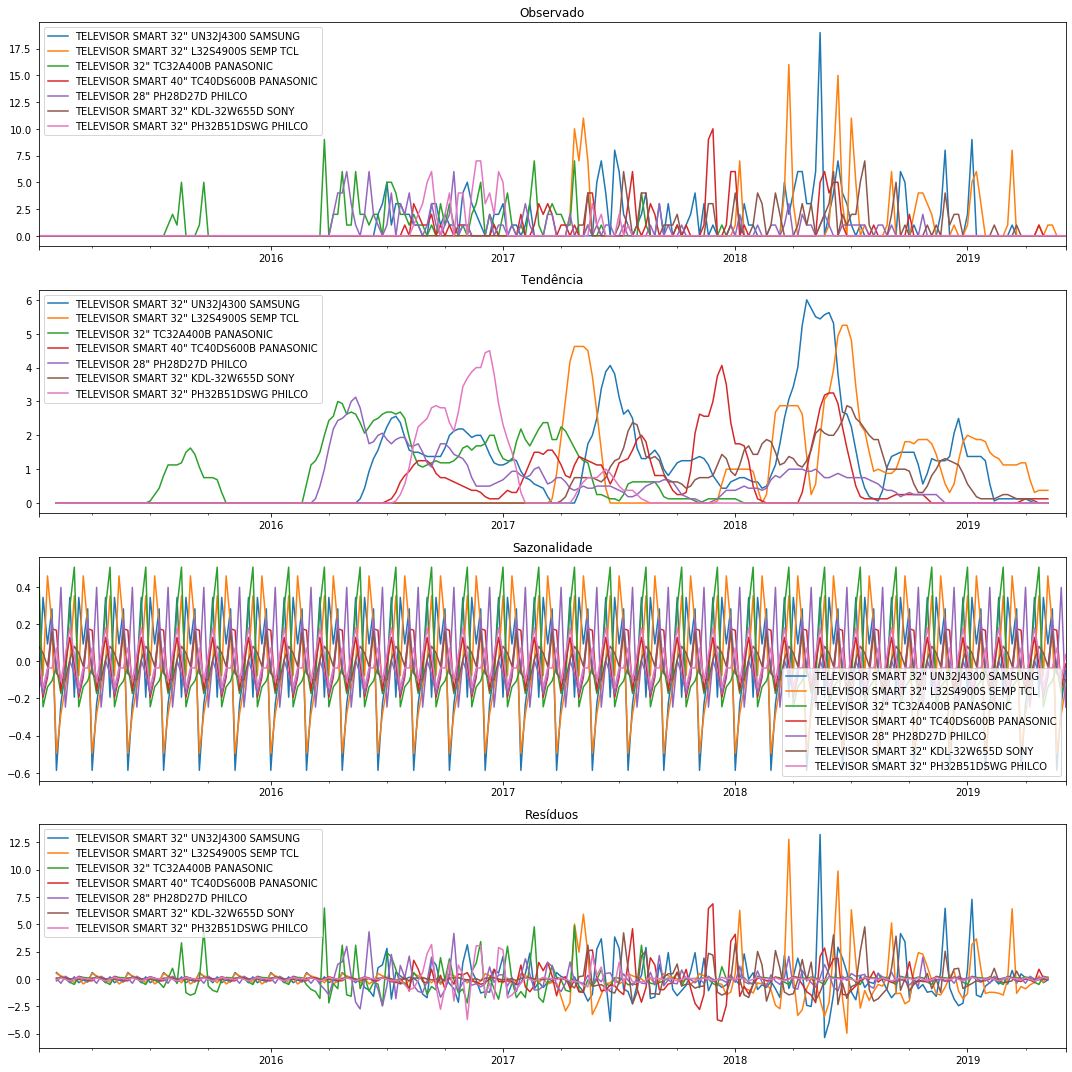

In [11]:
pd.plotting.register_matplotlib_converters()

products = ['TELEVISOR SMART 32" UN32J4300 SAMSUNG', 'TELEVISOR SMART 32" L32S4900S SEMP TCL', 'TELEVISOR 32" TC32A400B PANASONIC', 'TELEVISOR SMART 40" TC40DS600B PANASONIC', 'TELEVISOR 28" PH28D27D PHILCO', 'TELEVISOR SMART 32" KDL-32W655D SONY', 'TELEVISOR SMART 32" PH32B51DSWG PHILCO']
result = seasonal_decompose(dfw[products], model='additive', freq = 8)

#Cria 4 figs
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize =(15,15))

#Plota
result.observed.plot(ax = ax1, title = "Observado")
result.trend.plot(ax = ax2, title = "Tendência")
result.seasonal.plot(ax = ax3, title = "Sazonalidade")
result.resid.plot(ax = ax4, title = "Resíduos")

plt.tight_layout()


Os modelos de televisores não apresentam, de certa forma, uma venda contínua. Em determinados momentos alguns televisores registram vendas, e em outros não. Possível notar picos de vendas também.

# Previsão de vendas utilizando a API Prophet

Adição dos feriados

In [56]:
mothers = pd.DataFrame({
    'holiday': 'Dia das mães',
    'ds': ['2015-05-10', '2016-05-08', '2017-05-14', '2018-05-13', '2019-05-12'],
    'lower_window': -7,
    'upper_window': 0
})
fathers = pd.DataFrame({
    'holiday': 'Dia dos pais',
    'ds': ['2015-08-09', '2016-08-14', '2017-08-13', '2018-08-12', '2019-08-11'],
    'lower_window': -7,
    'upper_window': 0
})
valentines = pd.DataFrame({
    'holiday': 'Dia dos namorados',
    'ds': ['2015-06-12', '2016-06-12', '2017-06-12', '2018-06-12', '2018-06-12'],
    'lower_window': -7,
    'upper_window': 0
})
christmas = pd.DataFrame({
    'holiday': 'Natal',
    'ds': ['2015-12-25', '2016-12-25', '2017-12-25', '2018-12-25', '2019-12-25'],
    'lower_window': -8, # Incluindo a véspera
    'upper_window': 0
})
bf = pd.DataFrame({
    'holiday': 'Black friday',
    'ds': ['2015-11-27', '2016-11-25', '2017-11-24', '2018-11-25', '2019-11-24'],
    'lower_window': -7,
    'upper_window': 0
})
childrens = pd.DataFrame({
    'holiday': 'Dia das crianças',
    'ds': ['2015-10-12', '2016-10-12', '2017-10-12', '2018-10-12', '2019-10-12'],
    'lower_window': -7,
    'upper_window': 0
})
easter = pd.DataFrame({
    'holiday': 'Páscoa',
    'ds': ['2015-04-05', '2016-03-27', '2017-04-16', '2018-04-01', '2019-04-21'], # Domingo de páscoa
    'lower_window': -7,
    'upper_window': 0
})
new_year = pd.DataFrame({
    'holiday': 'Ano Novo',
    'ds': ['2015-01-01', '2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01'],
    'lower_window': -8, # Adicionar a véspera
    'upper_window': 0
})
carnival = pd.DataFrame({
    'holiday': 'Carnaval',
    'ds': ['2015-02-18', '2016-02-10', '2017-03-01', '2018-02-14', '2019-03-06'], # Quarta feira de cinzas
    'lower_window': -7, # Adicionar a véspera
    'upper_window': 0
})

holidays = pd.concat((mothers, fathers, valentines, christmas, bf, childrens, easter, new_year))

In [57]:
def createProphetDataFrame(column):
    df2 = pd.DataFrame({'ds': dfw.index, 'y':dfw[column].values})
    df2['floor'] = 0

    return df2

Treino e teste - Separação

In [58]:
size_train = len(dfw[:'2018-01-01'])
size_test = len(dfw['2018-01-01':])

In [66]:
forecasts = []
for product in products:
    ph = Prophet(daily_seasonality=False,holidays=holidays)
    ph.fit(createProphetDataFrame(product)[:size_train])

    future = ph.make_future_dataframe(periods=size_test, freq='W-THU')
    forecasts.append(ph.predict(future))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/home/luyza/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mse = []
mad = []
for forecast in forecasts:
    i = 0
    mse.append(mean_squared_error(dfw[products[i]][size_train:], forecast['yhat'][size_train:]))
    mad.append(mean_absolute_error(dfw[products[i]][size_train:], forecast['yhat'][size_train:]))
    i += 1

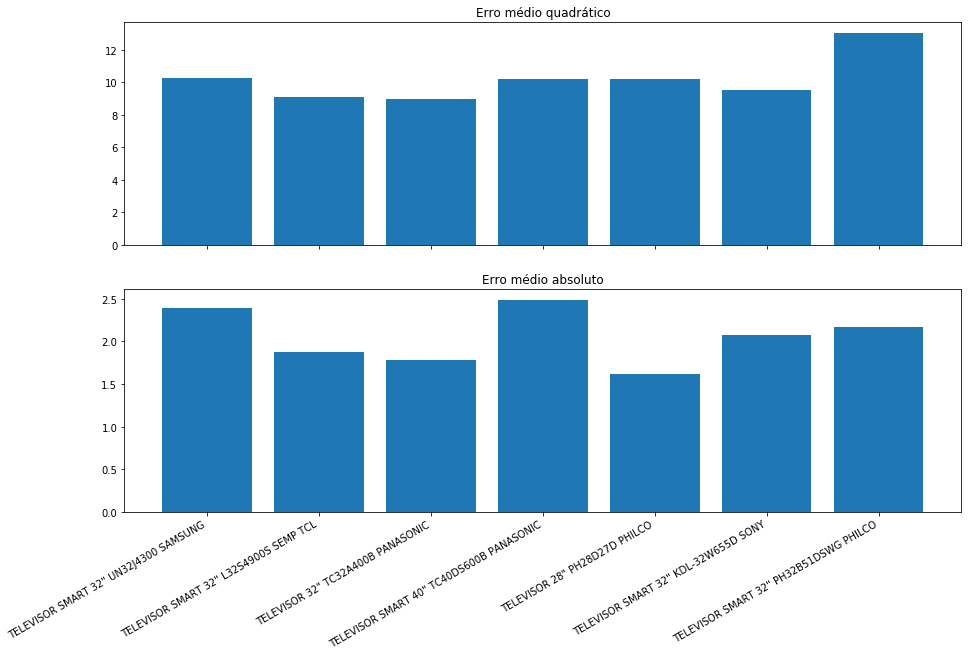

In [63]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1.bar(height=mse, x=products)
ax1.title.set_text('Erro médio quadrático')

ax2.bar(height=mad, x=products)
ax2.title.set_text('Erro médio absoluto')

fig.autofmt_xdate()
plt.show()

Consideráveis valores para os produtos.

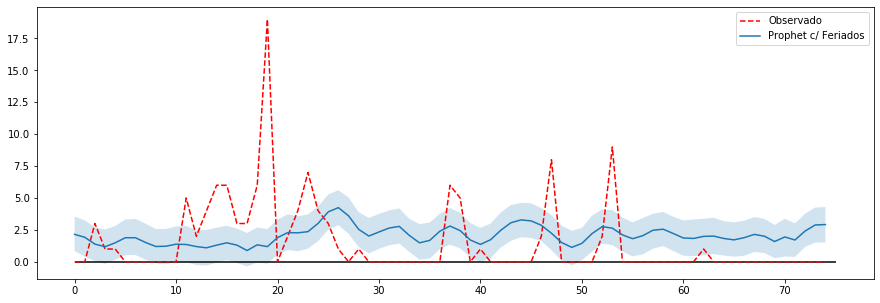

In [64]:
plt.figure(figsize = (15,5))
plt.plot(createProphetDataFrame(products[0])[size_train:]['y'].to_list(), 'r--')
plt.plot(forecasts[0][size_train:]['yhat'].to_list())
plt.hlines(xmin=0, xmax=size_test, y=0, color='black')
plt.fill_between(np.linspace(0, size_test-1, size_test), y1=forecasts[0][size_train:]['yhat_lower'], y2=forecasts[0][size_train:]['yhat_upper'], alpha = 0.2)
plt.legend(['Observado', 'Prophet c/ Feriados'], loc ='upper right')
plt.show()

Comparação entre a série temporal(Observado) e a prevista (Prophet). Aqui está sendo plotado apenas o televisor mais vendido "TELEVISOR SMART 32" UN32J4300 SAMSUNG". 

Podemos perceber que em alguns momentos o Observado não possui muitas vendas, principalmente depois da semana 50.

O modelo previsto não conseguiu previr muito bem as vendas observadas. 